In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

def get_opinion_from_random_person():
    # Usually this probabiliy is not known. Setting it here for simulation purposes.
    probability_of_alice_win = 0.53
    return np.random.binomial(
        n = 1,
        p = probability_of_alice_win)

get_opinion_from_random_person()

1

In [14]:
# def get_sample_from_distribution(n):
#     """
#     Creates an array of size n.
#     Each value will be 1 if some person would vote on Alice and
#     0 if he would vote on Bob.
#     """
#     sample_opinions = []
#     for i in range(n):
#         sample_opinions.append(get_opinion_from_random_person())
    
#     return sample_opinions

# example = get_sample_from_distribution(100)
# print(example)

In [15]:
# def get_n_samples_from_distribution(samples_number, sample_size):
#     """
#     Get multiple samples from our target 'unknown distribution'.
#     """
#     people_per_day = [sample_size] * samples_number
#     week_samples = list(map(get_sample_from_distribution, people_per_day))
#     return week_samples

# def get_n_sample_means_from_distribution(samples_number, sample_size):
#     samples = get_n_samples_from_distribution(
#         samples_number = samples_number,
#         sample_size = sample_size)

#     return list(map(np.mean, samples))

# sample_means = get_n_sample_means_from_distribution(5, 100)
# print(sample_means)

In [16]:
# fig, axes = plt.subplots(2,3, figsize = (12, 8))
# fig.subplots_adjust(hspace=0.4, wspace=0.3)
# axes = axes.ravel()

# days = [5, 50, 500, 1000]
# for i in range(len(days)):
#     sample_means = get_n_sample_means_from_distribution(
#         samples_number = days[i],
#         sample_size = 100)    
#     axes[i].hist(sample_means, bins=30)
#     axes[i].set_title("{0} days".format(days[i]))

In [17]:
from math import factorial
from math import log
import matplotlib.pyplot as plt
import random
import itertools
import collections
import csv

In [18]:
candidate_ranking = {}
candidate_ranking[1] = 'Aditya'
candidate_ranking[2] = 'Amrish'
candidate_ranking[3] = 'Sayan'
candidate_ranking[4] = 'Jayadev'
candidate_ranking[5] = 'Hardeep'
candidate_ranking[6] = 'Vishal'
candidate_ranking[7] = 'Vishesh'
candidate_ranking[8] = 'Somy'
candidate_ranking[9] = 'Sachin'
candidate_ranking[10] = 'Govind'

In [19]:
def cond_1(epsilon, m):
#     print(epsilon, m)
    return (2*epsilon)/factorial(m-1) + (1-epsilon)/factorial(m)

def cond_2(epsilon, m):
#     print(epsilon, m)
    return (1-epsilon)/factorial(m)

In [20]:
def borda_upper_bound(epsilon, delta, m):
    return (9/(2*(epsilon**2)))*(log((2*m)/delta))

In [21]:
def mu(epsilon, no_of_candidate, candidate):
    top_m_2 = int(no_of_candidate/2)

    for key in candidate_ranking.keys():
        if(candidate_ranking[key] == candidate):
#             print(key)
#             print(top_m_2)
            if key >= top_m_2:
                temp  = cond_1(epsilon, no_of_candidate)
            else:
                temp = cond_2(epsilon, no_of_candidate)
    
    return temp

In [22]:
epsilon    = float(input(":  epsilon value\t"))
no_of_candidate  = int(input(":  No of Candidates\t"))
delta = float(input(": delta value\t"))
# candidate = str(input(": Name of Candidate\t"))
candidate = 'Sayan'

print("Epsilon value" , "No_of_candidates", "delta value")
print (epsilon,"\t\t", no_of_candidate, "\t\t", delta)

# print("Name of Candidate")
# print(candidate)

:  epsilon value	0.1
:  No of Candidates	10
: delta value	0.5
Epsilon value No_of_candidates delta value
0.1 		 10 		 0.5


In [23]:
print("Mu Value: \t\t", mu(epsilon, no_of_candidate, candidate))
print("Borda Upper Bound: \t\t", borda_upper_bound(epsilon, delta, no_of_candidate))
borda_max = int(borda_upper_bound(epsilon, delta, no_of_candidate))

Mu Value: 		 2.48015873015873e-07
Borda Upper Bound: 		 1659.995754351271


In [35]:
V = []
W = []
candidate_pref = []
list_candidate_pref =[]
votes = int(10e3)
large = 10e10
newMu = large * mu(epsilon, no_of_candidate, candidate)
newMu = int(newMu)
print(newMu)

list_values = [ v for v in candidate_ranking.values() ]
for i in range(newMu):
    V.append(list_values)

for i in range(votes):
    randomPick = random.sample(V,1)
#     print(randomPick[0])
    W.append(random.sample(randomPick[0], len(randomPick[0])))
#     W.append(randomPick[0])
#     print(randomPick)

# for key in candidate_ranking.keys():
#     candidate_pref.append(candidate_ranking[key])
    


with open("W.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(W)
    
with open("V.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(V)

79916


In [25]:
# import itertools
# import collections

# def borda(ballot):
#     n = len([c for c in ballot if c.isalpha()]) - 1
#     score = itertools.count(n, step = -1)
#     result = {}
#     for group in [item.split('=') for item in ballot.split('>')]:
#         s = sum(next(score) for item in group)/float(len(group))
#         for pref in group:
#             result[pref] = s
#     return result

# def tally(ballots):
#     result = collections.defaultdict(int)
#     for ballot in ballots:
#         for pref,score in borda(ballot).iteritems():
#             result[pref]+=score
#     result = dict(result)
#     return result

# ballots = ['A>B>C>D>E',
#            'A>B>C=D=E',
#            'A>B=C>D>E', 
#            ]

# print(tally(ballots))

In [26]:
# valentine.votes([[clark, calisto, calvin]])

# # calisto
# veronica.votes([[clark, calvin, calisto]])
# who_is_superman.get_winner() is clark

In [27]:
# ballots = ['A>B>C>D>E',
#            'A>B>C=D=E',
#            'A>B=C>D>E',]
# result = collections.defaultdict(int)
# for ballot in ballots:
# #     print(ballot)
#     for pref,score in borda(ballot).iteritems():
#         pass
# #         result[pref]+=score
# # result = dict(result)

In [28]:
for key in candidate_ranking.keys():
    candidate = candidate_ranking[key]
    candidate_mu = mu(epsilon, 8, candidate)
    print("Mu for {}:\t \t {}".format(candidate, candidate_mu))

Mu for Aditya:	 	 2.232142857142857e-05
Mu for Amrish:	 	 2.232142857142857e-05
Mu for Sayan:	 	 2.232142857142857e-05
Mu for Jayadev:	 	 6.200396825396825e-05
Mu for Hardeep:	 	 6.200396825396825e-05
Mu for Vishal:	 	 6.200396825396825e-05
Mu for Vishesh:	 	 6.200396825396825e-05
Mu for Somy:	 	 6.200396825396825e-05
Mu for Sachin:	 	 6.200396825396825e-05
Mu for Govind:	 	 6.200396825396825e-05


In [29]:
# def plot_graph(x_axis, y_axis, x, y, x_step, y_step, title):
#     # plotting the points 
#     plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12) 

#     # setting x and y axis range 
#     plt.ylim(1,8) 
#     plt.xlim(1,8) 

#     # naming the axis 
#     plt.xlabel(x_axis) 
#     plt.ylabel(y_axis)
#     plt.title('Confidence value Vs No. of iterations') 
#     plt.show()

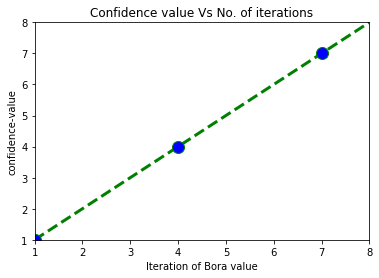

In [30]:
start = 1
end = 20
step = 3
x = []
y = []
x_axis = "Iteration of Bora value"

# double_quote_character = "b"
y_axis = 'confidence-value'

# x axis values
for i in range(start, end, step):
    x.append(i)

for j in range(start, end, step):
    y.append(j)

# x = [1,2,3,4,5,6] 
# # corresponding y axis values 
# y = [2,4,1,5,2,6] 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12) 

# setting x and y axis range 
plt.ylim(1,8) 
plt.xlim(1,8) 

# naming the x axis 
plt.xlabel(x_axis) 
# naming the y axis 
plt.ylabel(y_axis) 

# giving a title to my graph 
plt.title('Confidence value Vs No. of iterations') 

# function to show the plot 
plt.show() 
